# e23 Terrain Graph 2 Analysis

This notebook fetches runs from wandb tagged with `e23TG_neurogf_terrain_graph_2` and creates analysis plots.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import wandb_buddy as wb

## Notebook parameters

In [2]:
# Fetch runs with the specified tag
TAG = "e23TG_neurogf_terrain_graph_2"
ENTITY = "alelab"
PROJECT = "terrains"

# Use test_mae (computed from history) as the error metric
ERROR_COL = 'test_mae'
ERROR_LABEL = 'Test MAE'

## Fetch Runs from Wandb by Tag


In [3]:


print(f"Fetching runs with tag: {TAG}")
df = wb.load_runs(ENTITY, PROJECT, tags=[TAG])
print(f"Found {len(df)} runs")

Fetching runs with tag: e23TG_neurogf_terrain_graph_2


wandb: Currently logged in as: jotaporras (alelab) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Found 86 runs


In [4]:
df.head()

,name,id,state,created_at,heartbeat_at,tags,sweep_id,p,vn,new,...,sparse_gt_dropout,sparse_gt_num_hops,sparse_gt_input_dim,sparse_gt_num_heads,sparse_gt_hidden_dim,sparse_gt_num_layers,sparse_gt_output_dim,sparse_gt_attn_dropout,sparse_gt_rpearl_samples,sparse_gt_rpearl_num_layers
0,terrain-graph-TAGConv-res40-stage1,80eg729n,finished,2026-01-13T22:53:36Z,2026-01-14T02:54:20Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,terrain-graph-TAGConv-res40-stage1,8jrt6fb2,finished,2026-01-14T19:05:41Z,2026-01-14T20:03:44Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,terrain-graph-TAGConv-res40-stage1,8mmk9223,finished,2026-01-15T14:40:11Z,2026-01-17T12:19:12Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,terrain-graph-TAGConv-res36-stage1,sdg80scu,finished,2026-01-15T14:40:14Z,2026-01-17T12:14:32Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,terrain-graph-TAGConv-res37-stage1,0h390isk,finished,2026-01-15T14:40:15Z,2026-01-17T12:23:23Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check available columns
print("Available columns:")
print(df.columns.tolist())

Available columns:
['name', 'id', 'state', 'created_at', 'heartbeat_at', 'tags', 'sweep_id', 'p', 'vn', 'new', 'aggr', 'trial', 'device', 'epochs', 'log_dir', 'siamese', 'finetune', 'loss_func', 'test_data', 'artificial', 'batch_size', 'layer_type', 'train_data', 'config_file', 'dataset_name', 'finetune_from', 'learning_rate', 'test_resolution', 'train_resolution', 'include_edge_attr', 'model_config_name', '_runtime', '_step', '_timestamp', '_wandb', 'epoch', 'final_train_loss', 'final_train_mae', 'final_train_mse', 'final_train_nmae', 'global_step', 'test_loss', 'test_mae', 'test_mse', 'test_nmae', 'train_loss', 'train_mae', 'train_mse', 'train_nmae', 'test_batch_loss', 'test_batch_mae', 'test_batch_mse', 'test_batch_nmae', 'val_loss', 'val_mae', 'val_mse', 'val_nmae', 'sparse_gt_dropout', 'sparse_gt_num_hops', 'sparse_gt_input_dim', 'sparse_gt_num_heads', 'sparse_gt_hidden_dim', 'sparse_gt_num_layers', 'sparse_gt_output_dim', 'sparse_gt_attn_dropout', 'sparse_gt_rpearl_samples', 'spa

In [6]:
# Extract resolution from dataset_name
def extract_resolution(row):
    dataset_name = str(row['dataset_name'])
    res_match = re.search(r'res(\d+)', dataset_name)
    return int(res_match.group(1))

df['resolution'] = df.apply(extract_resolution, axis=1)
print(f"Runs with valid resolution: {len(df)}")

Runs with valid resolution: 86


In [7]:
# Add density column (inverse of resolution squared)
df['density'] = 1 / (df['resolution'] ** 2)

print(f"Total runs: {len(df)}")
print(f"\nRuns by layer type:")
print(df['layer_type'].value_counts())
print(f"\nResolutions available:")
print(sorted(df['resolution'].unique()))

Total runs: 86

Runs by layer type:
layer_type
SparseGT    55
TAGConv     31
Name: count, dtype: int64

Resolutions available:
[np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40)]


## Compute Test MAE from Batch History

The training script logs `test_batch_mae` for each batch during the final test evaluation, but only the 
last value is captured in the run summary. To get the true test MAE, we need to fetch the full metric 
history from wandb and average over all logged batches.

This is necessary because:
1. `test_mae` (the summary metric) is only logged for runs that completed all epochs
2. `test_batch_mae` in the summary only contains the last batch's value, not the average
3. By fetching the history and averaging, we can compute the correct test MAE for all runs that started test evaluation

In [8]:
import wandb

def get_metric_history_mean(entity: str, project: str, run_id: str, metric: str) -> float:
    """
    Fetch the full history of a metric from a wandb run and return its mean.
    
    Args:
        entity: wandb entity/team name
        project: wandb project name  
        run_id: the run ID
        metric: name of the metric to fetch (e.g., 'test_batch_mae')
    
    Returns:
        Mean of all logged values for the metric, or NaN if no values exist
    """
    api = wandb.Api()
    run = api.run(f"{entity}/{project}/{run_id}")
    history = run.history(keys=[metric], pandas=True)
    
    if history.empty or metric not in history.columns:
        return np.nan
    
    values = history[metric].dropna()
    if len(values) == 0:
        return np.nan
    
    return values.mean()


def add_metric_from_history(df: pd.DataFrame, entity: str, project: str, 
                            source_metric: str, target_col: str) -> pd.DataFrame:
    """
    Add a new column to df by fetching metric history from wandb and computing the mean.
    
    Args:
        df: DataFrame with 'id' column containing wandb run IDs
        entity: wandb entity name
        project: wandb project name
        source_metric: metric name to fetch from history (e.g., 'test_batch_mae')
        target_col: name of the new column to add (e.g., 'test_mae_from_history')
    
    Returns:
        DataFrame with new column added
    """
    from tqdm import tqdm
    
    means = []
    for run_id in tqdm(df['id'], desc=f"Fetching {source_metric} history"):
        mean_val = get_metric_history_mean(entity, project, run_id, source_metric)
        means.append(mean_val)
    
    df[target_col] = means
    return df

In [9]:
# Fetch test_batch_mae history and compute mean for each run
df = add_metric_from_history(df, ENTITY, PROJECT, 'test_batch_mae', 'test_mae')

print(f"Runs with valid test_mae (from history): {df['test_mae'].notna().sum()} / {len(df)}")
print(f"\nBy layer_type:")
print(df.groupby('layer_type')['test_mae'].apply(lambda x: f"{x.notna().sum()}/{len(x)} valid"))

Fetching test_batch_mae history: 100%|██████████| 86/86 [02:00<00:00,  1.40s/it]

Runs with valid test_mae (from history): 79 / 86

By layer_type:
layer_type
SparseGT    55/55 valid
TAGConv     24/31 valid
Name: test_mae, dtype: object


In [10]:
# Fetch test_batch_nmae history and compute mean for each run (Normalized MAE)
df = add_metric_from_history(df, ENTITY, PROJECT, 'test_batch_nmae', 'test_nmae')

print(f"Runs with valid test_nmae (from history): {df['test_nmae'].notna().sum()} / {len(df)}")
print(f"\nBy layer_type:")
print(df.groupby('layer_type')['test_nmae'].apply(lambda x: f"{x.notna().sum()}/{len(x)} valid"))

Fetching test_batch_nmae history: 100%|██████████| 86/86 [01:55<00:00,  1.34s/it]

Runs with valid test_nmae (from history): 79 / 86

By layer_type:
layer_type
SparseGT    55/55 valid
TAGConv     24/31 valid
Name: test_nmae, dtype: object


In [11]:
df[['id','created_at','state','resolution','density','layer_type','test_batch_mae','test_mae']].head(25).sort_values('created_at', ascending=True)

,id,created_at,state,resolution,density,layer_type,test_batch_mae,test_mae
0,80eg729n,2026-01-13T22:53:36Z,finished,40,0.000625,TAGConv,NaN,NaN
1,8jrt6fb2,2026-01-14T19:05:41Z,finished,40,0.000625,TAGConv,NaN,NaN
2,8mmk9223,2026-01-15T14:40:11Z,finished,40,0.000625,TAGConv,NaN,NaN
3,sdg80scu,2026-01-15T14:40:14Z,finished,36,0.000772,TAGConv,NaN,NaN
4,0h390isk,2026-01-15T14:40:15Z,finished,37,0.000730,TAGConv,NaN,NaN
5,itvp59om,2026-01-15T14:40:15Z,finished,39,0.000657,TAGConv,NaN,NaN
6,pehei5yb,2026-01-15T14:40:15Z,finished,38,0.000693,TAGConv,NaN,NaN
7,kk0krllh,2026-01-17T20:02:20Z,finished,39,0.000657,TAGConv,0.175213,0.165233
8,w50g89x2,2026-01-17T20:02:20Z,finished,40,0.000625,TAGConv,0.197514,0.187323
9,53oj07c9,2026-01-17T20:02:27Z,finished,38,0.000693,TAGConv,0.204143,0.195022


In [28]:
df[df.layer_type=='TAGConv'].train_resolution

0     res40_phase1.npz
1     res40_phase1.npz
2     res40_phase1.npz
3     res36_phase1.npz
4     res37_phase1.npz
5     res39_phase1.npz
6     res38_phase1.npz
7     res39_phase1.npz
8     res40_phase1.npz
9     res38_phase1.npz
10    res36_phase1.npz
11    res37_phase1.npz
12    res35_phase1.npz
16    res32_phase1.npz
17    res33_phase1.npz
18    res34_phase1.npz
22    res31_phase1.npz
23    res30_phase1.npz
24    res29_phase1.npz
28    res28_phase1.npz
29    res27_phase1.npz
30    res26_phase1.npz
34    res25_phase1.npz
35    res24_phase1.npz
36    res23_phase1.npz
40    res21_phase1.npz
41    res22_phase1.npz
42    res20_phase1.npz
46    res19_phase1.npz
47    res18_phase1.npz
48    res17_phase1.npz
Name: train_resolution, dtype: object

In [12]:


# Check how many runs have valid test_mae values
print(f"Runs with valid {ERROR_COL}: {df[ERROR_COL].notna().sum()} / {len(df)}")
print(f"\nBy layer_type:")
print(df.groupby('layer_type')[ERROR_COL].apply(lambda x: f"{x.notna().sum()}/{len(x)} valid"))

print("\nSample data:")
#df[['name', 'layer_type', 'resolution', 'density', 'stage', ERROR_COL]].head(10)
df[['name', 'layer_type', 'resolution', 'density', ERROR_COL]].head(10)

Runs with valid test_mae: 79 / 86

By layer_type:
layer_type
SparseGT    55/55 valid
TAGConv     24/31 valid
Name: test_mae, dtype: object

Sample data:


,name,layer_type,resolution,density,test_mae
0,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
1,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
2,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
3,terrain-graph-TAGConv-res36-stage1,TAGConv,36,0.000772,NaN
4,terrain-graph-TAGConv-res37-stage1,TAGConv,37,0.000730,NaN
5,terrain-graph-TAGConv-res39-stage1,TAGConv,39,0.000657,NaN
6,terrain-graph-TAGConv-res38-stage1,TAGConv,38,0.000693,NaN
7,terrain-graph-TAGConv-res39-stage1,TAGConv,39,0.000657,0.165233
8,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,0.187323
9,terrain-graph-TAGConv-res38-stage1,TAGConv,38,0.000693,0.195022


In [13]:
# Check all test-related columns and their coverage
test_cols = [c for c in df.columns if 'test' in c.lower()]
print("Test metric coverage by layer_type:\n")
for col in test_cols:
    valid_counts = df.groupby('layer_type')[col].apply(lambda x: x.notna().sum())
    total_counts = df.groupby('layer_type').size()
    print(f"{col}:")
    for lt in valid_counts.index:
        print(f"  {lt}: {valid_counts[lt]}/{total_counts[lt]}")
    print()

Test metric coverage by layer_type:

test_data:
  SparseGT: 55/55
  TAGConv: 31/31

test_resolution:
  SparseGT: 55/55
  TAGConv: 31/31

test_loss:
  SparseGT: 0/55
  TAGConv: 7/31

test_mae:
  SparseGT: 55/55
  TAGConv: 24/31

test_mse:
  SparseGT: 0/55
  TAGConv: 7/31

test_nmae:
  SparseGT: 55/55
  TAGConv: 24/31

test_batch_loss:
  SparseGT: 55/55
  TAGConv: 24/31

test_batch_mae:
  SparseGT: 55/55
  TAGConv: 24/31

test_batch_mse:
  SparseGT: 55/55
  TAGConv: 24/31

test_batch_nmae:
  SparseGT: 55/55
  TAGConv: 24/31



In [14]:
df.sort_values('resolution', ascending=False)[['name', 'layer_type', 'resolution', 'density', ERROR_COL]]

,name,layer_type,resolution,density,test_mae
0,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
1,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
2,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
8,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,0.187323
15,terrain-graph-SparseGT-res40-stage1,SparseGT,40,0.000625,0.190540
...,...,...,...,...,...
81,terrain-graph-SparseGT-res11-stage1,SparseGT,11,0.008264,0.149735
80,terrain-graph-SparseGT-res10-stage1,SparseGT,10,0.010000,0.155562
82,terrain-graph-SparseGT-res09-stage1,SparseGT,9,0.012346,0.154173
83,terrain-graph-SparseGT-res08-stage1,SparseGT,8,0.015625,0.159004


## Performance Plot


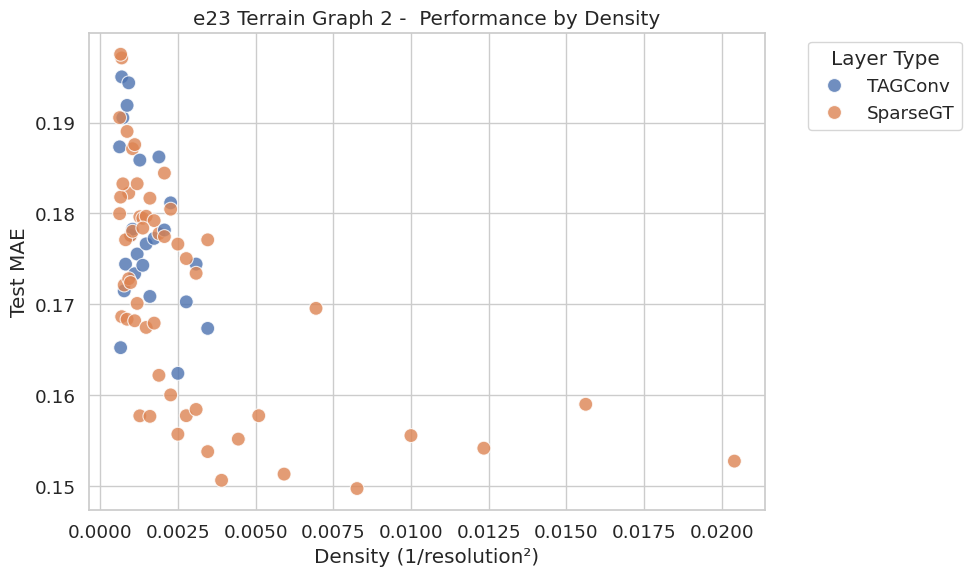

In [15]:
# Set plot style
sns.set_theme(style="whitegrid", font_scale=1.2)

df_plot = df

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='density',
    y=ERROR_COL,
    hue='layer_type',
    s=100,
    alpha=0.8,
    ax=ax
)

ax.set_xlabel('Density (1/resolution²)')
ax.set_ylabel(ERROR_LABEL)
ax.set_title(f'e23 Terrain Graph 2 -  Performance by Density')
ax.legend(title='Layer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

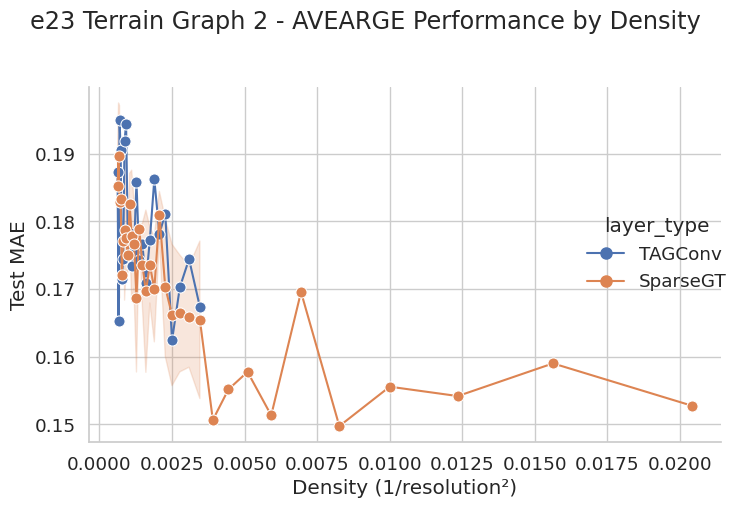

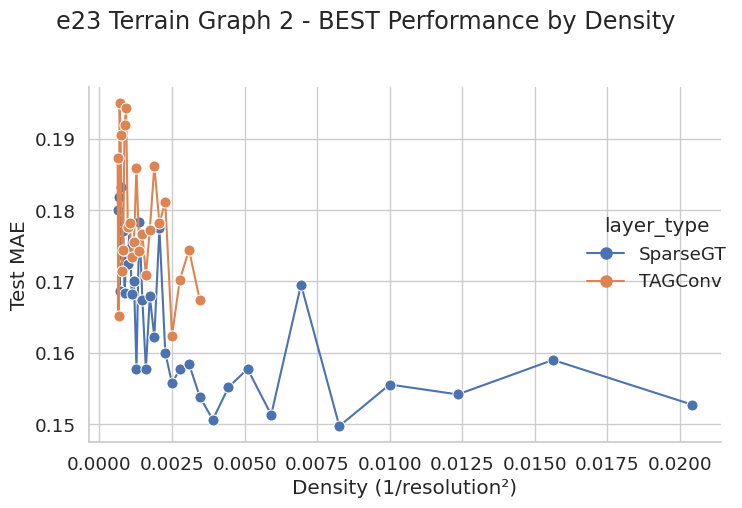

In [16]:
# Best performance per density per layer_type
# Filter out rows with NaN in ERROR_COL before groupby to avoid KeyError
df_valid = df.dropna(subset=[ERROR_COL])
best_per_density = df_valid.loc[df_valid.groupby(['layer_type', 'density'])[ERROR_COL].idxmin()]
df_plot = df_valid
# df_plot = best_per_density
g2 = sns.relplot(
    data=df_plot,
    x='density',
    y=ERROR_COL,
    hue='layer_type',
    kind='line',
    marker='o',
    markersize=8,
    height=5,
    aspect=1.2
)

g2.set_axis_labels('Density (1/resolution²)', ERROR_LABEL)
g2.fig.suptitle(f'e23 Terrain Graph 2 - AVEARGE Performance by Density', y=1.02)

plt.tight_layout()
plt.show()

df_plot = best_per_density
g2 = sns.relplot(
    data=df_plot,
    x='density',
    y=ERROR_COL,
    hue='layer_type',
    kind='line',
    marker='o',
    markersize=8,
    height=5,
    aspect=1.2
)

g2.set_axis_labels('Density (1/resolution²)', ERROR_LABEL)
g2.fig.suptitle(f'e23 Terrain Graph 2 - BEST Performance by Density', y=1.02)

plt.tight_layout()
plt.show()

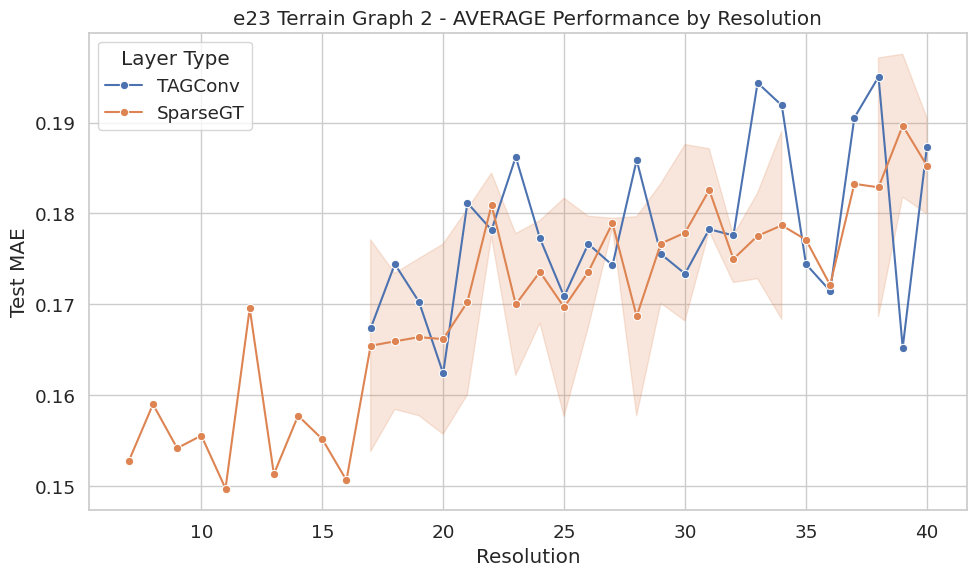

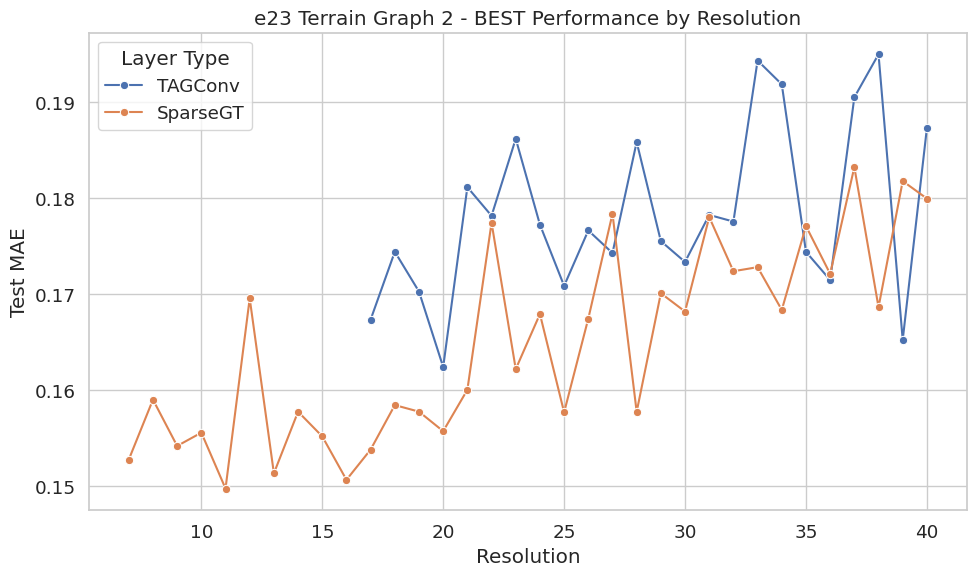

In [17]:
# Performance by resolution (easier to interpret)
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=df_valid.sort_values("layer_type",ascending=False),
    x='resolution',
    y=ERROR_COL,
    hue='layer_type',
    marker='o',
    ax=ax
)

ax.set_xlabel('Resolution')
ax.set_ylabel(ERROR_LABEL)
ax.set_title('e23 Terrain Graph 2 - AVERAGE Performance by Resolution')
ax.legend(title='Layer Type')

plt.tight_layout()
plt.show()

# Performance by resolution (easier to interpret)
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=best_per_density.sort_values("layer_type",ascending=False),
    x='resolution',
    y=ERROR_COL,
    hue='layer_type',
    marker='o',
    ax=ax
)

ax.set_xlabel('Resolution')
ax.set_ylabel(ERROR_LABEL)
ax.set_title('e23 Terrain Graph 2 - BEST Performance by Resolution')
ax.legend(title='Layer Type')

plt.tight_layout()
plt.show()

In [18]:
df_valid.test_nmae

7     0.016479
8     0.018156
9     0.018757
10    0.016847
11    0.018271
        ...   
81    0.016594
82    0.017266
83    0.017073
84    0.017787
85    0.016579
Name: test_nmae, Length: 79, dtype: float64

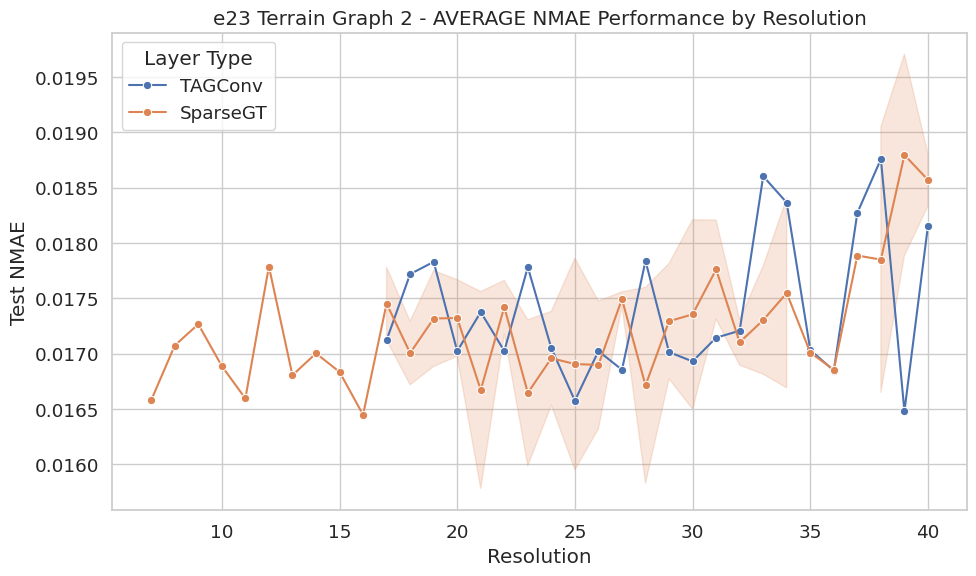

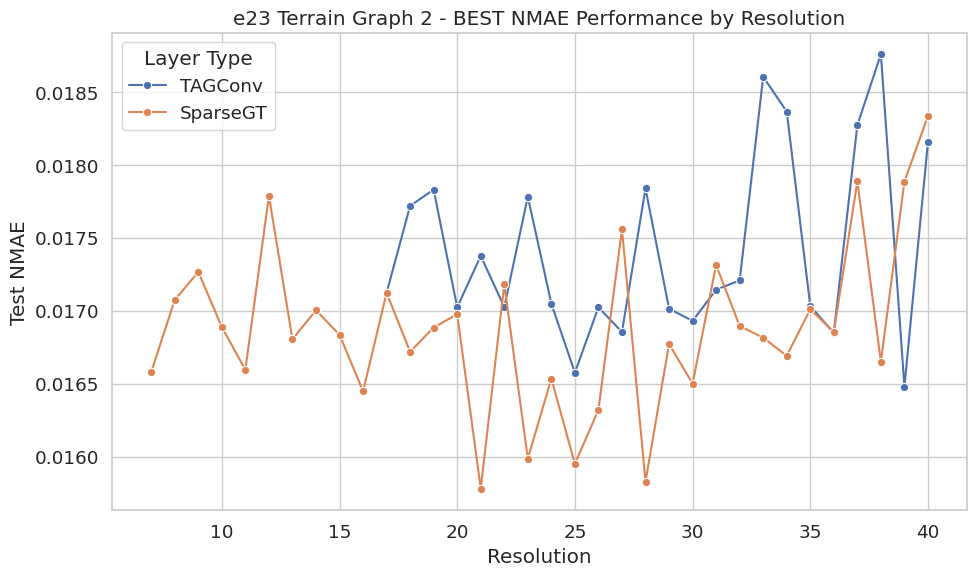

In [19]:
# Performance by resolution (NMAE)
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=df_valid.sort_values("layer_type",ascending=False),
    x='resolution',
    y='test_nmae',
    hue='layer_type',
    marker='o',
    ax=ax
)

ax.set_xlabel('Resolution')
ax.set_ylabel('Test NMAE')
ax.set_title('e23 Terrain Graph 2 - AVERAGE NMAE Performance by Resolution')
ax.legend(title='Layer Type')

plt.tight_layout()
plt.show()

# Performance by resolution (NMAE)
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=best_per_density.sort_values("layer_type",ascending=False),
    x='resolution',
    y='test_nmae',
    hue='layer_type',
    marker='o',
    ax=ax
)

ax.set_xlabel('Resolution')
ax.set_ylabel('Test NMAE')
ax.set_title('e23 Terrain Graph 2 - BEST NMAE Performance by Resolution')
ax.legend(title='Layer Type')

plt.tight_layout()
plt.show()

## Summary Statistics


In [20]:
# Summary table by resolution and layer_type
print("Summary by resolution and layer_type:")
summary = df.groupby(['resolution', 'layer_type'])[ERROR_COL].agg(['mean', 'std', 'count']).round(4)
summary

Summary by resolution and layer_type:


,,mean,std,count
resolution,layer_type,,,
7,SparseGT,0.1528,NaN,1
8,SparseGT,0.1590,NaN,1
9,SparseGT,0.1542,NaN,1
10,SparseGT,0.1556,NaN,1
11,SparseGT,0.1497,NaN,1
12,SparseGT,0.1696,NaN,1
13,SparseGT,0.1513,NaN,1
14,SparseGT,0.1577,NaN,1
15,SparseGT,0.1552,NaN,1


In [21]:
# Best performing runs
print("Best performing runs:")
df_valid = df.dropna(subset=[ERROR_COL])
best_run = df_valid.loc[df_valid[ERROR_COL].idxmin()]
print(f"\nBest Overall:")
print(f"  Run: {best_run['name']}")
print(f"  Layer Type: {best_run['layer_type']}")
print(f"  Resolution: {best_run['resolution']}")
print(f"  {ERROR_LABEL}: {best_run[ERROR_COL]:.6f}")

Best performing runs:

Best Overall:
  Run: terrain-graph-SparseGT-res11-stage1
  Layer Type: SparseGT
  Resolution: 11
  Test MAE: 0.149735


In [22]:
# Comparison between layer types
print(f"\nMean Error by Layer Type:")
layer_summary = df.groupby('layer_type')[ERROR_COL].agg(['mean', 'std', 'min', 'max', 'count'])
layer_summary


Mean Error by Layer Type:


,mean,std,min,max,count
layer_type,,,,,
SparseGT,0.171627,0.012478,0.149735,0.197511,55
TAGConv,0.178330,0.009024,0.162406,0.195022,24


---
# Paper-Quality Visualizations

The following cells add publication-quality visualizations for:
1. Norway terrain graph structure overlaid on elevation
2. Embedding heatmaps (PCA components spatially mapped)
3. Error spatial distribution maps
4. Enhanced error distribution analysis
5. SparseGT effectiveness comparison panels

In [23]:
# Paper-quality style setup
import matplotlib as mpl
import sys
import os
import torch

# Add project root to path
sys.path.insert(0, '/home/jporras/sourcecode/shortest-paths-nn')

def setup_paper_style():
    """Configure matplotlib for publication-quality figures."""
    plt.style.use('seaborn-v0_8-whitegrid')
    
    mpl.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['DejaVu Serif', 'Times New Roman'],
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'legend.fontsize': 11,
        'xtick.labelsize': 11,
        'ytick.labelsize': 11,
        'figure.dpi': 150,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.05,
        'axes.linewidth': 1.2,
        'grid.linewidth': 0.8,
        'lines.linewidth': 2.0,
        'lines.markersize': 8,
    })

# Color palette for visualizations
COLORS = {
    'SparseGT': '#1f77b4',  # Blue
    'TAGConv': '#ff7f0e',   # Orange
}

setup_paper_style()
print("Paper style configured.")

Paper style configured.


## 1. Load Terrain Data (DEM and Graph)

In [24]:
# Load DEM (Digital Elevation Model) data
from dataset.dataset import load_dem_data_, get_dem_xv_yv_

DEM_PATH = "../data/norway-smallest.txt"
DATA_DIR = "../data/generated2"

# Load raw DEM
dem_array = load_dem_data_(DEM_PATH, imperial=False)

# Get coordinate grids (in km) - don't visualize yet
xv_km, yv_km, elev_km = get_dem_xv_yv_(dem_array, resolution=10, visualize=False)

print(f"DEM shape: {dem_array.shape}")
print(f"Elevation range: {elev_km.min():.3f} - {elev_km.max():.3f} km")

/home/jporras/miniconda3/envs/shortest-paths-nn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'point_sampler'

In [ ]:
# Load terrain graph data for visualization
# Using resolution 20 as a good balance between detail and visibility

def load_terrain_graph(resolution: int, phase: int = 1) -> dict:
    """Load terrain graph NPZ data for a specific resolution."""
    data_path = os.path.join(DATA_DIR, f"res{resolution:02d}_phase{phase}.npz")
    if not os.path.exists(data_path):
        # Try without zero-padding
        data_path = os.path.join(DATA_DIR, f"res{resolution}_phase{phase}.npz")
    data = np.load(data_path, allow_pickle=True)
    return {key: data[key] for key in data.files}

# Load a medium resolution graph for visualization
VIZ_RESOLUTION = 20
graph_data = load_terrain_graph(VIZ_RESOLUTION)

print(f"Loaded terrain graph at resolution {VIZ_RESOLUTION}")
print(f"  Nodes: {len(graph_data['node_features'])}")
print(f"  Edges: {graph_data['edge_index'].shape[1]}")
print(f"  Source-target pairs: {len(graph_data['srcs'])}")

NameError: name 'DATA_DIR' is not defined

## 2. Norway Terrain Graph Visualization

Visualize the terrain graph structure overlaid on the DEM elevation contours.

In [ ]:
def plot_terrain_graph_overlay(
    graph_data: dict,
    xv_km: np.ndarray,
    yv_km: np.ndarray,
    elevation_km: np.ndarray,
    title: str = None,
    figsize: tuple = (12, 10),
    edge_alpha: float = 0.15,
    node_size: float = 8,
    show_edges: bool = True,
    max_edges: int = 5000,
    save_path: str = None
) -> plt.Figure:
    """
    Visualize terrain graph structure overlaid on DEM elevation contours.
    
    Args:
        graph_data: Dict with 'node_features' and 'edge_index'
        xv_km, yv_km, elevation_km: DEM coordinate grids in km
        title: Plot title
        figsize: Figure size
        edge_alpha: Transparency for edges
        node_size: Size of node markers
        show_edges: Whether to draw edges
        max_edges: Max edges to draw (for performance)
        save_path: Path to save figure
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # DEM contour background
    contour = ax.contourf(xv_km, yv_km, elevation_km, levels=50, cmap='terrain', alpha=0.85)
    cbar = plt.colorbar(contour, ax=ax, label='Elevation (km)', shrink=0.8)
    
    # Extract node positions
    node_features = graph_data['node_features']
    x_coords = node_features[:, 0]  # x_km
    y_coords = node_features[:, 1]  # y_km
    
    # Draw edges (subsample if too many)
    if show_edges:
        edge_index = graph_data['edge_index']
        n_edges = edge_index.shape[1]
        
        if n_edges > max_edges:
            # Randomly subsample edges
            edge_indices = np.random.choice(n_edges, max_edges, replace=False)
        else:
            edge_indices = range(n_edges)
        
        for idx in edge_indices:
            src, tar = edge_index[0, idx], edge_index[1, idx]
            ax.plot([x_coords[src], x_coords[tar]], 
                    [y_coords[src], y_coords[tar]], 
                    'k-', alpha=edge_alpha, linewidth=0.5)
    
    # Draw nodes
    ax.scatter(x_coords, y_coords, s=node_size, c='darkred', alpha=0.7, 
               zorder=5, edgecolors='white', linewidths=0.3)
    
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    if title:
        ax.set_title(title)
    ax.set_aspect('equal')
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    return fig

In [ ]:
# Create terrain graph visualization
fig = plot_terrain_graph_overlay(
    graph_data,
    xv_km, yv_km, elev_km,
    title=f'Norway Terrain Graph (Resolution {VIZ_RESOLUTION}, {len(graph_data["node_features"])} nodes)',
    figsize=(14, 11),
    edge_alpha=0.12,
    node_size=12,
    max_edges=8000
)
plt.tight_layout()
plt.show()

NameError: name 'graph_data' is not defined

## 3. Embedding Heatmaps

Load trained models and visualize learned node embeddings spatially using PCA.

In [ ]:
# Model loading helpers
from src.custom_models import SparseGTWithRPEARL
from src.baselines import GNNModel

def get_model_checkpoint_path(run_id: str, entity: str = ENTITY, project: str = PROJECT) -> str:
    """Get model checkpoint path from a wandb run's log_dir config."""
    api = wandb.Api()
    run = api.run(f"{entity}/{project}/{run_id}")
    log_dir = run.config.get('log_dir')
    if log_dir:
        checkpoint_path = os.path.join(log_dir, 'final_model.pt')
        if os.path.exists(checkpoint_path):
            return checkpoint_path
    return None

def load_sparse_gt_model(checkpoint_path: str, config: dict = None) -> torch.nn.Module:
    """Load a SparseGT model from checkpoint."""
    # Default config based on sparse-gt-rpearl.yml
    default_config = {
        'input_dim': 3,
        'hidden_dim': 64,
        'output_dim': 64,
        'num_layers': 3,
        'num_heads': 4,
        'num_hops': 3,
        'rpearl_samples': 30,
        'rpearl_num_layers': 5,
        'dropout': 0.3,
        'attn_dropout': 0.1
    }
    if config:
        default_config.update(config)
    
    model = SparseGTWithRPEARL(**default_config)
    state_dict = torch.load(checkpoint_path, map_location='cpu')
    model.load_state_dict(state_dict)
    model.to(torch.double)
    model.eval()
    return model

def load_tagconv_model(checkpoint_path: str) -> torch.nn.Module:
    """Load a TAGConv model from checkpoint."""
    model = GNNModel(
        input=3, output=64, hidden=64, layers=3,
        layer_type='TAGConv', activation='LeakyReLU'
    )
    state_dict = torch.load(checkpoint_path, map_location='cpu')
    model.load_state_dict(state_dict)
    model.to(torch.double)
    model.eval()
    return model

def compute_embeddings(model, graph_data: dict, layer_type: str) -> np.ndarray:
    """Compute node embeddings from a trained model."""
    node_features = torch.tensor(graph_data['node_features'], dtype=torch.double)
    edge_index = torch.tensor(graph_data['edge_index'], dtype=torch.long)
    
    with torch.no_grad():
        if layer_type == 'SparseGT':
            from torch_geometric.data import Data
            data = Data(x=node_features, edge_index=edge_index)
            embeddings = model(data)
        else:
            embeddings = model(node_features, edge_index)
    
    return embeddings.numpy()

print("Model loading helpers defined.")

Model loading helpers defined.


In [ ]:
from sklearn.decomposition import PCA

def plot_embedding_heatmaps(
    embeddings: np.ndarray,
    node_features: np.ndarray,
    n_components: int = 3,
    model_name: str = "",
    figsize: tuple = (16, 5),
    save_path: str = None
) -> plt.Figure:
    """
    Visualize learned node embeddings spatially using PCA components.
    
    Args:
        embeddings: Node embeddings [num_nodes, embedding_dim]
        node_features: Node feature array [num_nodes, 3] with (x, y, z)
        n_components: Number of PCA components to visualize
        model_name: Name for title
        figsize: Figure size
        save_path: Path to save figure
    """
    # PCA reduction
    pca = PCA(n_components=n_components)
    pca_embeddings = pca.fit_transform(embeddings)
    
    # Extract node positions
    x_coords = node_features[:, 0]
    y_coords = node_features[:, 1]
    
    fig, axes = plt.subplots(1, n_components, figsize=figsize)
    if n_components == 1:
        axes = [axes]
    
    for i, ax in enumerate(axes):
        scatter = ax.scatter(
            x_coords, y_coords, 
            c=pca_embeddings[:, i], 
            cmap='viridis', 
            s=15, 
            alpha=0.85
        )
        var_explained = pca.explained_variance_ratio_[i] * 100
        plt.colorbar(scatter, ax=ax, label=f'PC{i+1} ({var_explained:.1f}%)', shrink=0.8)
        ax.set_xlabel('X (km)')
        ax.set_ylabel('Y (km)')
        ax.set_title(f'PCA Component {i+1}')
        ax.set_aspect('equal')
    
    plt.suptitle(f'{model_name} Learned Embedding Spatial Distribution', y=1.02, fontsize=14)
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    return fig

In [ ]:
# Find best SparseGT run at the visualization resolution and load model
best_sparse_gt = df_valid[
    (df_valid['layer_type'] == 'SparseGT') & 
    (df_valid['resolution'] == VIZ_RESOLUTION)
].sort_values(ERROR_COL).iloc[0] if len(df_valid[(df_valid['layer_type'] == 'SparseGT') & (df_valid['resolution'] == VIZ_RESOLUTION)]) > 0 else None

if best_sparse_gt is not None:
    print(f"Best SparseGT run at res{VIZ_RESOLUTION}: {best_sparse_gt['name']} (MAE: {best_sparse_gt[ERROR_COL]:.4f})")
    
    # Try to load the model checkpoint
    checkpoint_path = get_model_checkpoint_path(best_sparse_gt['id'])
    if checkpoint_path:
        print(f"Loading checkpoint from: {checkpoint_path}")
        sparse_gt_model = load_sparse_gt_model(checkpoint_path)
        sparse_gt_embeddings = compute_embeddings(sparse_gt_model, graph_data, 'SparseGT')
        print(f"Computed embeddings shape: {sparse_gt_embeddings.shape}")
        
        # Plot embedding heatmaps
        fig = plot_embedding_heatmaps(
            sparse_gt_embeddings, 
            graph_data['node_features'],
            n_components=3,
            model_name='SparseGT',
            figsize=(18, 5)
        )
        plt.show()
    else:
        print("Checkpoint not found. Skipping embedding visualization.")
        print("Note: Model checkpoints may not be available if runs were on a different machine.")
else:
    print(f"No SparseGT run found at resolution {VIZ_RESOLUTION}")

Best SparseGT run at res20: terrain-graph-SparseGT-res20-stage1 (MAE: 0.1557)
Checkpoint not found. Skipping embedding visualization.
Note: Model checkpoints may not be available if runs were on a different machine.


## 4. Error Spatial Map

Visualize spatial distribution of prediction errors across the terrain. This shows which regions are harder to predict.

In [ ]:
def plot_error_spatial_map(
    predictions_df: pd.DataFrame,
    node_features: np.ndarray,
    error_metric: str = 'pred_maes',
    aggregation: str = 'mean',
    model_name: str = '',
    figsize: tuple = (14, 6),
    save_path: str = None
) -> plt.Figure:
    """
    Visualize spatial distribution of prediction errors on terrain.
    
    Args:
        predictions_df: DataFrame with columns: srcs, tars, preds, lengths, pred_maes, etc.
        node_features: Node feature array [num_nodes, 3]
        error_metric: Column name for error ('pred_maes', 'pred_mses', 'pred_nmaes')
        aggregation: 'mean', 'max', or 'sum'
        model_name: Model name for title
        figsize: Figure size
        save_path: Path to save figure
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Aggregate errors by source and target nodes
    src_errors = predictions_df.groupby('srcs')[error_metric].agg(aggregation)
    tar_errors = predictions_df.groupby('tars')[error_metric].agg(aggregation)
    
    x_coords = node_features[:, 0]
    y_coords = node_features[:, 1]
    
    for ax, (node_type, errors) in zip(axes, [('Source', src_errors), ('Target', tar_errors)]):
        # Create full error array (NaN for nodes without predictions)
        error_values = np.full(len(node_features), np.nan)
        for node_idx, err in errors.items():
            if 0 <= int(node_idx) < len(error_values):
                error_values[int(node_idx)] = err
        
        # Calculate percentiles for color scale (ignore NaN)
        valid_errors = error_values[~np.isnan(error_values)]
        if len(valid_errors) > 0:
            vmin = np.percentile(valid_errors, 5)
            vmax = np.percentile(valid_errors, 95)
        else:
            vmin, vmax = 0, 1
        
        # Plot with masked array for NaN handling
        scatter = ax.scatter(
            x_coords, y_coords,
            c=error_values,
            cmap='RdYlGn_r',  # Red=high error, Green=low
            s=20,
            alpha=0.85,
            vmin=vmin,
            vmax=vmax
        )
        plt.colorbar(scatter, ax=ax, label=f'{aggregation.title()} {error_metric}', shrink=0.8)
        ax.set_xlabel('X (km)')
        ax.set_ylabel('Y (km)')
        ax.set_title(f'Error by {node_type} Node')
        ax.set_aspect('equal')
    
    plt.suptitle(f'{model_name} Spatial Distribution of Prediction Errors', y=1.02, fontsize=14)
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    return fig

In [ ]:
# Generate error spatial map using loaded model (if available)
# If model checkpoint isn't available, we'll demonstrate with synthetic error data

if 'sparse_gt_embeddings' in dir():
    # Compute predictions using Siamese distance metric (L2 norm)
    srcs = graph_data['srcs']
    tars = graph_data['tars']
    lengths = graph_data['lengths']
    
    src_emb = sparse_gt_embeddings[srcs]
    tar_emb = sparse_gt_embeddings[tars]
    
    # Siamese prediction: L2 distance between embeddings
    preds = np.linalg.norm(src_emb - tar_emb, ord=2, axis=1)
    
    # Compute errors
    pred_maes = np.abs(preds - lengths)
    pred_nmaes = pred_maes / (lengths + 1e-8)
    
    # Create predictions DataFrame
    predictions_df = pd.DataFrame({
        'srcs': srcs,
        'tars': tars,
        'preds': preds,
        'lengths': lengths,
        'pred_maes': pred_maes,
        'pred_nmaes': pred_nmaes
    })
    
    print(f"Predictions: {len(predictions_df)}")
    print(f"Mean MAE: {pred_maes.mean():.4f}")
    print(f"Mean NMAE: {pred_nmaes.mean():.4f}")
    
    # Plot error spatial map
    fig = plot_error_spatial_map(
        predictions_df,
        graph_data['node_features'],
        error_metric='pred_maes',
        aggregation='mean',
        model_name='SparseGT',
        figsize=(16, 7)
    )
    plt.show()
else:
    print("Model embeddings not available. Skipping error spatial map.")
    print("Note: Run the embedding extraction cell above first, or ensure checkpoint is available.")

Model embeddings not available. Skipping error spatial map.
Note: Run the embedding extraction cell above first, or ensure checkpoint is available.


## 5. Enhanced Error Distribution Analysis

Comprehensive comparison of error distributions between SparseGT and TAGConv.

In [ ]:
def plot_error_distributions(
    df: pd.DataFrame,
    error_col: str = 'test_mae',
    figsize: tuple = (16, 5),
    save_path: str = None
) -> plt.Figure:
    """
    Create comprehensive error distribution visualizations.
    
    Panels:
    1. Histogram/KDE of errors by layer type
    2. Box plot comparison
    3. Error vs Resolution line plot with confidence intervals
    """
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    df_plot = df.dropna(subset=[error_col])
    
    # Panel 1: KDE plot
    ax1 = axes[0]
    for layer_type in ['SparseGT', 'TAGConv']:
        subset = df_plot[df_plot['layer_type'] == layer_type][error_col]
        if len(subset) > 0:
            sns.kdeplot(subset, ax=ax1, label=layer_type, color=COLORS[layer_type], 
                       fill=True, alpha=0.3, linewidth=2)
    ax1.set_xlabel('Test MAE')
    ax1.set_ylabel('Density')
    ax1.set_title('Error Distribution by Model Type')
    ax1.legend()
    
    # Panel 2: Box plot with swarm overlay
    ax2 = axes[1]
    palette = [COLORS['SparseGT'], COLORS['TAGConv']]
    order = ['SparseGT', 'TAGConv']
    sns.boxplot(data=df_plot, x='layer_type', y=error_col, ax=ax2, 
                palette=palette, order=order, width=0.5)
    sns.stripplot(data=df_plot, x='layer_type', y=error_col, ax=ax2,
                  palette=palette, order=order, alpha=0.5, size=4)
    ax2.set_xlabel('Model Type')
    ax2.set_ylabel('Test MAE')
    ax2.set_title('Error Comparison')
    
    # Add mean values as text
    for i, lt in enumerate(order):
        mean_val = df_plot[df_plot['layer_type'] == lt][error_col].mean()
        ax2.text(i, mean_val, f'μ={mean_val:.3f}', ha='center', va='bottom', fontsize=10)
    
    # Panel 3: Error vs Resolution with CI
    ax3 = axes[2]
    for layer_type in ['SparseGT', 'TAGConv']:
        subset = df_plot[df_plot['layer_type'] == layer_type]
        if len(subset) > 0:
            sns.lineplot(
                data=subset, x='resolution', y=error_col,
                ax=ax3, label=layer_type, color=COLORS[layer_type],
                marker='o', errorbar=('ci', 95), linewidth=2
            )
    ax3.set_xlabel('Resolution')
    ax3.set_ylabel('Test MAE')
    ax3.set_title('Error vs Graph Resolution')
    ax3.legend()
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    return fig

/tmp/ipykernel_931126/1102761121.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='layer_type', y=error_col, ax=ax2,
/tmp/ipykernel_931126/1102761121.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot, x='layer_type', y=error_col, ax=ax2,


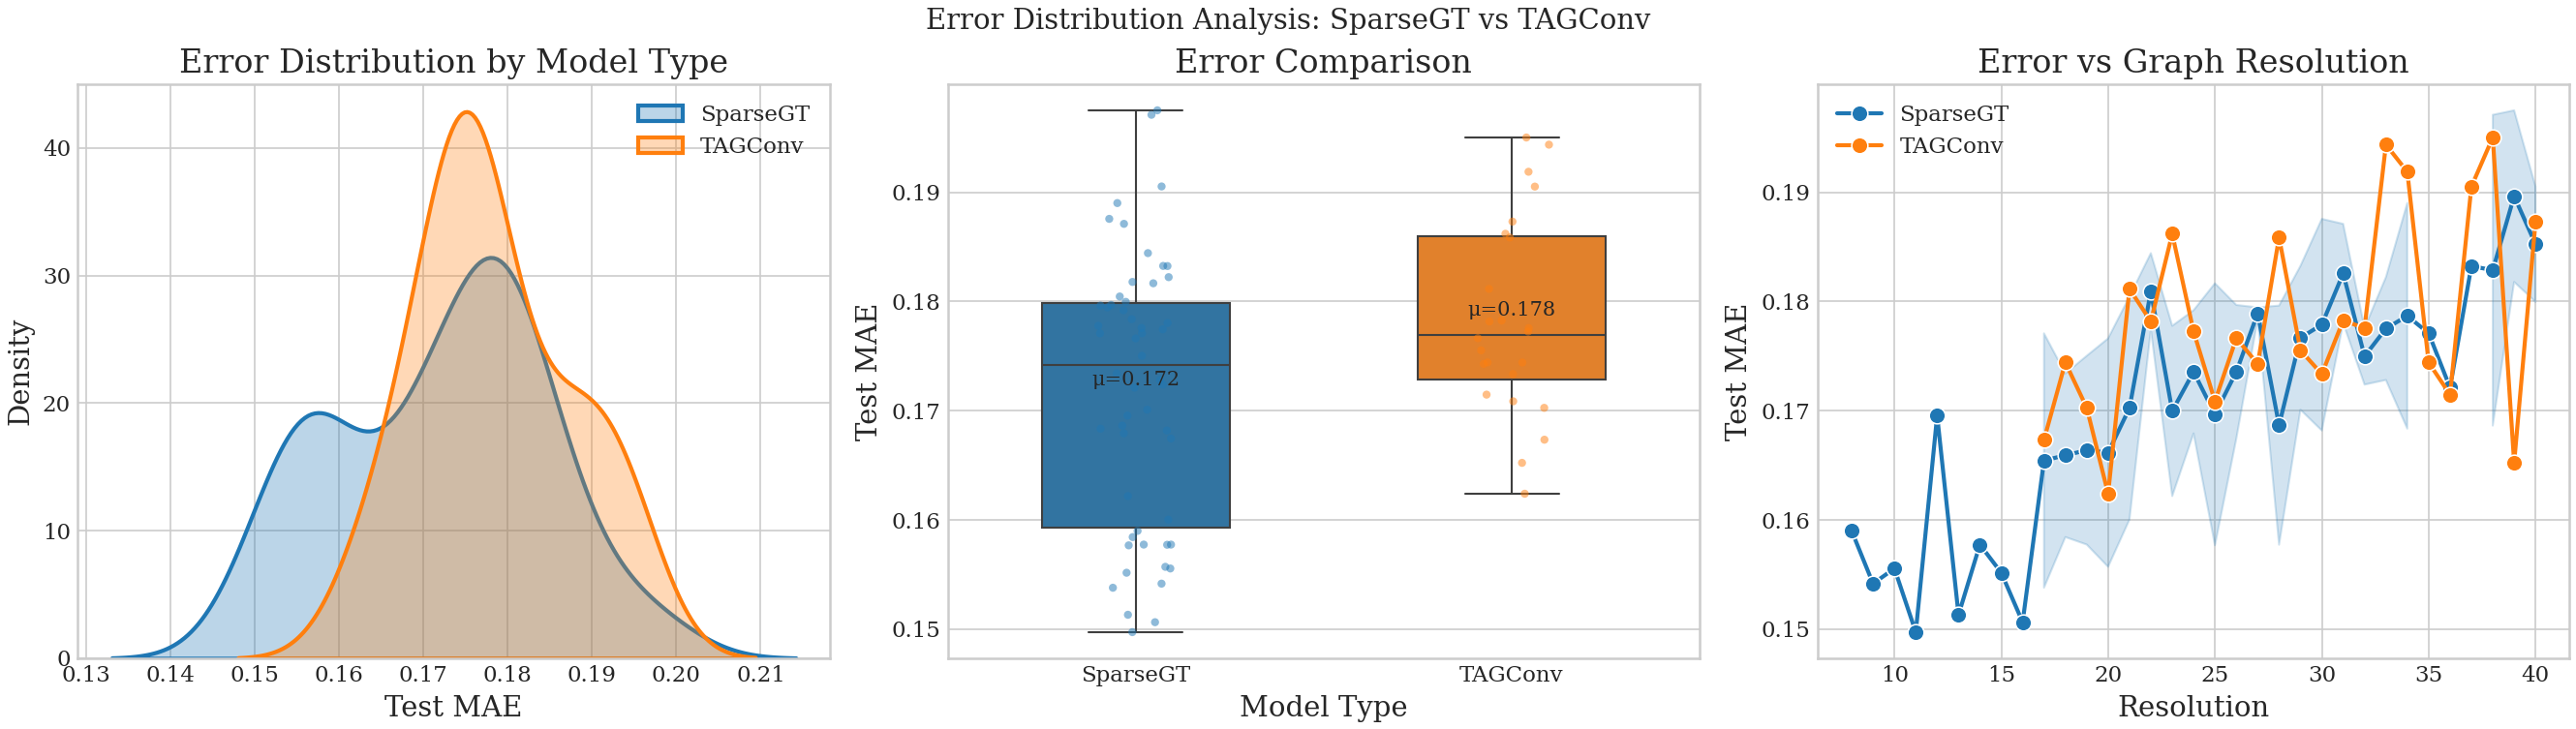

In [ ]:
# Create enhanced error distribution plots
fig = plot_error_distributions(df, error_col=ERROR_COL, figsize=(18, 5))
plt.suptitle('Error Distribution Analysis: SparseGT vs TAGConv', y=1.02, fontsize=14)
plt.show()

## 6. SparseGT Effectiveness Analysis

Multi-panel visualization demonstrating SparseGT advantages over TAGConv.

In [ ]:
def plot_sparsegt_effectiveness(
    df: pd.DataFrame,
    error_col: str = 'test_mae',
    figsize: tuple = (16, 12),
    save_path: str = None
) -> plt.Figure:
    """
    Multi-panel visualization demonstrating SparseGT effectiveness.
    
    Panels:
    1. Improvement percentage by resolution
    2. Direct comparison with error bars
    3. Cumulative wins across resolutions
    4. Error scaling with graph size
    """
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.25)
    
    df_plot = df.dropna(subset=[error_col])
    
    # Compute comparative metrics
    pivot_mean = df_plot.pivot_table(values=error_col, index='resolution', 
                                      columns='layer_type', aggfunc='mean')
    pivot_std = df_plot.pivot_table(values=error_col, index='resolution', 
                                     columns='layer_type', aggfunc='std')
    
    # Only include resolutions where both models have data
    common_resolutions = pivot_mean.dropna().index
    pivot_mean = pivot_mean.loc[common_resolutions]
    pivot_std = pivot_std.loc[common_resolutions].fillna(0)
    
    # Panel 1: Improvement percentage
    ax1 = fig.add_subplot(gs[0, 0])
    if 'TAGConv' in pivot_mean.columns and 'SparseGT' in pivot_mean.columns:
        improvement = ((pivot_mean['TAGConv'] - pivot_mean['SparseGT']) / pivot_mean['TAGConv'] * 100)
        colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in improvement.values]
        bars = ax1.bar(improvement.index, improvement.values, color=colors, alpha=0.8, edgecolor='black')
        ax1.axhline(y=0, color='black', linestyle='--', linewidth=1.5)
        ax1.set_xlabel('Resolution')
        ax1.set_ylabel('Improvement (%)')
        ax1.set_title('SparseGT Improvement over TAGConv')
        
        # Add value labels
        for bar, val in zip(bars, improvement.values):
            y_pos = bar.get_height() + 0.2 if bar.get_height() >= 0 else bar.get_height() - 0.5
            ax1.text(bar.get_x() + bar.get_width()/2, y_pos, f'{val:.1f}%', 
                    ha='center', va='bottom' if val >= 0 else 'top', fontsize=8)
    
    # Panel 2: Direct comparison with error bars
    ax2 = fig.add_subplot(gs[0, 1])
    if 'TAGConv' in pivot_mean.columns and 'SparseGT' in pivot_mean.columns:
        width = 0.35
        resolutions = pivot_mean.index.values
        x = np.arange(len(resolutions))
        
        ax2.bar(x - width/2, pivot_mean['SparseGT'], width, 
                yerr=pivot_std['SparseGT'], label='SparseGT', 
                color=COLORS['SparseGT'], alpha=0.8, capsize=3, edgecolor='black')
        ax2.bar(x + width/2, pivot_mean['TAGConv'], width,
                yerr=pivot_std['TAGConv'], label='TAGConv',
                color=COLORS['TAGConv'], alpha=0.8, capsize=3, edgecolor='black')
        ax2.set_xlabel('Resolution')
        ax2.set_ylabel('Test MAE')
        ax2.set_title('Performance Comparison with Variance')
        ax2.set_xticks(x[::3])
        ax2.set_xticklabels(resolutions[::3])
        ax2.legend()
    
    # Panel 3: Cumulative wins
    ax3 = fig.add_subplot(gs[1, 0])
    if 'TAGConv' in pivot_mean.columns and 'SparseGT' in pivot_mean.columns:
        wins_sparse = (pivot_mean['SparseGT'] < pivot_mean['TAGConv']).cumsum()
        wins_tag = (pivot_mean['TAGConv'] < pivot_mean['SparseGT']).cumsum()
        ax3.plot(pivot_mean.index, wins_sparse, 'o-', label='SparseGT Wins', 
                color=COLORS['SparseGT'], linewidth=2, markersize=8)
        ax3.plot(pivot_mean.index, wins_tag, 's-', label='TAGConv Wins', 
                color=COLORS['TAGConv'], linewidth=2, markersize=8)
        ax3.fill_between(pivot_mean.index, wins_sparse, alpha=0.2, color=COLORS['SparseGT'])
        ax3.fill_between(pivot_mean.index, wins_tag, alpha=0.2, color=COLORS['TAGConv'])
        ax3.set_xlabel('Resolution')
        ax3.set_ylabel('Cumulative Wins')
        ax3.set_title('Cumulative Best Performance Count')
        ax3.legend()
    
    # Panel 4: Error vs Number of Nodes (complexity scaling)
    ax4 = fig.add_subplot(gs[1, 1])
    df_copy = df_plot.copy()
    # Approximate node count from resolution (grid graph)
    df_copy['approx_nodes'] = df_copy['resolution'] ** 2
    
    for layer_type in ['SparseGT', 'TAGConv']:
        subset = df_copy[df_copy['layer_type'] == layer_type]
        if len(subset) > 0:
            sns.regplot(
                data=subset, x='approx_nodes', y=error_col,
                ax=ax4, label=layer_type, color=COLORS[layer_type],
                scatter_kws={'alpha': 0.5, 's': 50}, 
                line_kws={'linestyle': '--', 'linewidth': 2}
            )
    ax4.set_xlabel('Approximate Node Count (resolution²)')
    ax4.set_ylabel('Test MAE')
    ax4.set_title('Error Scaling with Graph Size')
    ax4.legend()
    
    plt.suptitle('SparseGT Effectiveness Analysis', fontsize=16, y=1.01)
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    return fig

In [ ]:
# Create SparseGT effectiveness analysis
fig = plot_sparsegt_effectiveness(df, error_col=ERROR_COL, figsize=(18, 12))
plt.show()

KeyError: '[35, 36, 37] not in index'

<Figure size 2700x1800 with 0 Axes>

## 7. Error vs Path Length Analysis

Analyze how prediction errors vary with the true shortest path distance.

In [ ]:
def plot_error_vs_path_length(
    predictions_df: pd.DataFrame,
    model_name: str = '',
    n_bins: int = 15,
    figsize: tuple = (12, 5),
    save_path: str = None
) -> plt.Figure:
    """
    Plot prediction error vs true shortest path length.
    
    Shows how model performance varies with path difficulty/length.
    
    Args:
        predictions_df: DataFrame with columns: lengths, pred_maes, pred_nmaes
        model_name: Name for title
        n_bins: Number of bins for path length
        figsize: Figure size
        save_path: Path to save figure
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Bin by path length
    df_copy = predictions_df.copy()
    df_copy['length_bin'] = pd.cut(df_copy['lengths'], bins=n_bins)
    
    # Compute statistics per bin
    binned_mae = df_copy.groupby('length_bin')['pred_maes'].agg(['mean', 'std', 'count'])
    binned_nmae = df_copy.groupby('length_bin')['pred_nmaes'].agg(['mean', 'std', 'count'])
    
    # Get bin centers
    bin_centers = [interval.mid for interval in binned_mae.index]
    
    # Panel 1: Absolute Error vs Path Length
    ax1 = axes[0]
    ax1.errorbar(bin_centers, binned_mae['mean'], yerr=binned_mae['std'],
                fmt='o-', capsize=4, color=COLORS['SparseGT'], linewidth=2, 
                markersize=8, label='Mean MAE')
    ax1.set_xlabel('True Path Length (km)')
    ax1.set_ylabel('Mean Absolute Error')
    ax1.set_title('Absolute Error vs Path Length')
    
    # Add secondary axis for sample count
    ax1_twin = ax1.twinx()
    ax1_twin.bar(bin_centers, binned_mae['count'], alpha=0.15, width=bin_centers[1]-bin_centers[0], 
                 color='gray', label='Sample Count')
    ax1_twin.set_ylabel('Sample Count', color='gray')
    ax1_twin.tick_params(axis='y', labelcolor='gray')
    
    # Panel 2: Relative Error vs Path Length
    ax2 = axes[1]
    ax2.errorbar(bin_centers, binned_nmae['mean'] * 100, yerr=binned_nmae['std'] * 100,
                fmt='s-', capsize=4, color=COLORS['TAGConv'], linewidth=2,
                markersize=8, label='Mean NMAE')
    ax2.set_xlabel('True Path Length (km)')
    ax2.set_ylabel('Mean Normalized Error (%)')
    ax2.set_title('Relative Error vs Path Length')
    
    # Add secondary axis for sample count
    ax2_twin = ax2.twinx()
    ax2_twin.bar(bin_centers, binned_nmae['count'], alpha=0.15, width=bin_centers[1]-bin_centers[0],
                 color='gray')
    ax2_twin.set_ylabel('Sample Count', color='gray')
    ax2_twin.tick_params(axis='y', labelcolor='gray')
    
    plt.suptitle(f'{model_name} Error vs Path Length Analysis', y=1.02, fontsize=14)
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    return fig

In [ ]:
# Create error vs path length plot (if predictions available)
if 'predictions_df' in dir():
    fig = plot_error_vs_path_length(
        predictions_df,
        model_name='SparseGT',
        n_bins=15,
        figsize=(14, 5)
    )
    plt.show()
else:
    print("Predictions not available. Run the error spatial map cell first.")
    print("This visualization requires model predictions to be computed.")

Predictions not available. Run the error spatial map cell first.
This visualization requires model predictions to be computed.


## 8. Export Figures

Save all figures at publication quality (300 DPI).

In [ ]:
# Create figures directory if it doesn't exist
FIGURES_DIR = "figures/e23_analysis"
os.makedirs(FIGURES_DIR, exist_ok=True)

# Save all paper-quality figures
print("Saving figures to:", FIGURES_DIR)

# 1. Terrain graph overlay
fig1 = plot_terrain_graph_overlay(
    graph_data, xv_km, yv_km, elev_km,
    title=f'Norway Terrain Graph (Resolution {VIZ_RESOLUTION})',
    figsize=(12, 10),
    save_path=os.path.join(FIGURES_DIR, 'terrain_graph_overlay.png')
)
plt.close(fig1)

# 2. Error distributions
fig2 = plot_error_distributions(df, error_col=ERROR_COL, figsize=(16, 5),
                                save_path=os.path.join(FIGURES_DIR, 'error_distributions.png'))
plt.close(fig2)

# 3. SparseGT effectiveness
fig3 = plot_sparsegt_effectiveness(df, error_col=ERROR_COL, figsize=(16, 12),
                                   save_path=os.path.join(FIGURES_DIR, 'sparsegt_effectiveness.png'))
plt.close(fig3)

# 4. Embedding heatmaps (if available)
if 'sparse_gt_embeddings' in dir():
    fig4 = plot_embedding_heatmaps(
        sparse_gt_embeddings, graph_data['node_features'],
        n_components=3, model_name='SparseGT', figsize=(16, 5),
        save_path=os.path.join(FIGURES_DIR, 'embedding_heatmaps.png')
    )
    plt.close(fig4)

# 5. Error spatial map (if available)
if 'predictions_df' in dir():
    fig5 = plot_error_spatial_map(
        predictions_df, graph_data['node_features'],
        error_metric='pred_maes', model_name='SparseGT', figsize=(14, 6),
        save_path=os.path.join(FIGURES_DIR, 'error_spatial_map.png')
    )
    plt.close(fig5)
    
    # 6. Error vs path length
    fig6 = plot_error_vs_path_length(
        predictions_df, model_name='SparseGT', figsize=(12, 5),
        save_path=os.path.join(FIGURES_DIR, 'error_vs_path_length.png')
    )
    plt.close(fig6)

print("\\nAll figures saved successfully!")

Saving figures to: figures/e23_analysis


NameError: name 'graph_data' is not defined